In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

vg_data = pd.read_csv('data/vgsales.csv')
dinamic_by_region = vg_data[
        ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Year_of_Release']
    ].groupby('Year_of_Release').sum()

fig = plt.figure(figsize=(12, 6))
lineplot = sns.lineplot(data=dinamic_by_region)
lineplot.set_title('Динамика продаж видеоигр', fontsize=10)
lineplot.set_xlabel('Год выпуска')
lineplot.set_ylabel('Суммарный объём продаж')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

melb_data = pd.read_csv('data/melb_data.csv')

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))
plt.subplots_adjust(hspace=.0)

histplot1 = sns.histplot(
    data=melb_data, 
    x='Price', 
    bins=30,
    ax=axes[0],
)
histplot1.set_title('Распределение стоимости недвижимости в Мельбурне', fontsize=16)
histplot1.set_xlabel('Цена объекта (млн. австралийских долларов)')
histplot1.set_ylabel('Число объектов')

histplot2 = sns.histplot(
    data=melb_data,
    x='Price',
    y='Type',
    bins=30,
    color='green',
    ax=axes[1]
)
histplot2.set_xlabel('Цена объекта (млн. австралийских долларов)')
histplot2.set_ylabel('Тип объекта')


In [ ]:
covid_data = pd.read_csv('data/covid_data.csv', sep=',')
vaccinations_data = pd.read_csv('data/country_vaccinations.csv')
vaccinations_data = vaccinations_data[
    ['country', 'date', 'total_vaccinations', 
     'people_vaccinated', 'people_vaccinated_per_hundred',
     'people_fully_vaccinated', 'people_fully_vaccinated_per_hundred',
     'daily_vaccinations', 'vaccines']
]
covid_data = covid_data.groupby(['date', 'country'], as_index=False)[['confirmed', 'deaths', 'recovered']].sum()
covid_data['date'] = pd.to_datetime(covid_data['date'])
covid_data['active'] = covid_data['confirmed'] - covid_data['deaths'] - covid_data['recovered']
covid_data = covid_data.sort_values(by=['country', 'date'])
covid_data['daily_confirmed'] = covid_data.groupby('country')['confirmed'].diff()
covid_data['daily_deaths'] = covid_data.groupby('country')['deaths'].diff()
covid_data['daily_recovered'] = covid_data.groupby('country')['recovered'].diff()
vaccinations_data['date'] = pd.to_datetime(vaccinations_data['date'])
vaccinations_data['date'].sort_values()



In [ ]:
covid_df = covid_data.merge(
    vaccinations_data,
    on=['date', 'country'],
    how='left'
)
print('string number:', covid_df.shape[0])
print('column number:', covid_df.shape[1])

In [ ]:
covid_df['death_rate'] = covid_df['deaths'] / covid_df['confirmed'] *100
covid_df['recover_rate'] = covid_df['recovered'] / covid_df['confirmed'] * 100
round(covid_df[covid_df['country'] == 'Russia']['recover_rate'].mean(), 2)

In [ ]:
grouped_cases = covid_df.groupby('date')['daily_confirmed'].sum()
grouped_cases.plot(
    kind='line', # Тип графика
    figsize=(12 ,4), # Размер графика
    title='Ежедневная заболеваемость во времени', # Название
    grid=True, # Отображение сетки
    lw=3 # Толщина линии
);


In [ ]:
grouped_cases = covid_df.groupby('date')['daily_confirmed'].sum()
grouped_cases.plot(
    kind='hist', # Тип графика
    figsize=(10 ,6), # Размер графика
    title='Ежедневная заболеваемость во времени', # Название
    grid=True, # Отображение сетки
    bins=10
);

In [ ]:
grouped_cases = covid_df.groupby(['country'])[['confirmed', 'deaths']].last()
grouped_cases = grouped_cases.nlargest(10, columns=['confirmed'])
grouped_cases.plot(
    kind='bar', # Тип графика
    figsize=(12 ,4), # Размер графика
    title='Ежедневная заболеваемость во времени', # Название
    grid=True, # Отображение сетки
);

In [ ]:
covid_df.groupby(['country'])['total_vaccinations'].last().nsmallest(5).plot(kind='bar');

In [ ]:
us_data = covid_df[covid_df['country'] == 'United States']

fig = plt.figure(figsize=(8, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.scatter(
    x=us_data['people_fully_vaccinated'],
    y=us_data['daily_confirmed'],
    s=10,
    marker='o',
    c = 'blue'
);

In [ ]:
combination_not_nan = covid_df.dropna(subset=['vaccines'])
combinations_last = combination_not_nan.groupby(['country'])['vaccines'].last()



vaccine_combintations = covid_df['vaccines'].value_counts()[:10]
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    vaccine_combintations,
    labels= vaccine_combintations.index,
    autopct= '%.1f%%',
    explode=[0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
);

In [ ]:
# Удаление пропусков в столбце с вакцинами
combination_not_nan = covid_df.dropna(subset=['vaccines'])
# Группировка по странам и выбор последней комбинации вакцин в стране
combination_last = combination_not_nan.groupby(['country'])['vaccines'].last()
# ЗАмена пробелов в строках и деление комбинаций на отдельные вакцины по запятой
combination_last = combination_last.apply(lambda x: x.replace(' ', '').split(','))
# Создается пустой словарь, ключами которого будут вакцины, а значениями будет
# количество стран
vaccines_dict = {}
# Cоздается цикл по элементам Series combinations_last
for vaccines_list in combination_last:
    # Создается цикл по элементам из списка vaccine_list
    for vaccine in vaccines_list:
        # Проверяется условие, что текущей вакцины нет среди ключей словаря
        if vaccine not in vaccines_dict: # Если условие выполняется
            vaccines_dict[vaccine] = 1 # Вакцина заносится в словарь со значением 1
        else: # Если нет, то
            vaccines_dict[vaccine] += 1 # увеличивается значение вакцины в словаре

# Преобразование словаря в Series            
vaccines = pd.Series(vaccines_dict).sort_values(ascending=False)
# Перевод топ-7 вакцин в формат other
vaccines['other'] = vaccines[7:].sum()
#
vaccines = vaccines.sort_values(ascending=False)[:8]

fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    vaccines,
    labels= vaccines.index,
    autopct= '%.1f%%'
);

In [ ]:
# Выделение Китая для создания графика
china_data = covid_df[covid_df['country'] == 'China']
#Выделение параметров для графика
china_grouped = china_data.groupby(['date'])['confirmed', 'active', 'deaths', 'recovered'].sum()
#

fig = plt.figure(figsize=(10, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.plot(china_grouped['confirmed'], label = 'Общее число зафиксированных случаев', lw=3)
axes.plot(china_grouped['active'], label = 'Общее число активных случаев', lw=3)
axes.plot(china_grouped['recovered'], label = 'Общее число выздоровевших пациентов', lw=3)
axes.plot(china_grouped['deaths'], label = 'Общее число смертей', lw=3,  linestyle = 'dashed')

# Заголовок
axes.set_title('Covid statistics in China', fontsize=16)

# Параметр для оси Х (Даты)
axes.set_xlabel('Dates')

# Параметр для оси У (Случаи заражения)
axes.set_ylabel('Cases')

#
axes.set_yticks(range(0, 100000, 10000))
#
axes.xaxis.set_tick_params(rotation=30)
#
axes.grid()
axes.legend();

In [ ]:
vacc_country = covid_df.groupby('country')['people_fully_vaccinated'].last().nlargest(5)
vacc_country_per_hundred = covid_df.groupby('country')['people_fully_vaccinated_per_hundred'].last().nlargest(5)
fig = plt.figure(figsize=(13, 4))
main_axes = fig.add_axes([0, 0, 1, 1])
main_axes.bar(x = vacc_country.index, height=vacc_country);
main_axes.set_ylabel('number of vaccinated with 2 component')
main_axes.set_title('Top 5 fully vaccinated countries')
main_axes.grid()

insert_axes = fig.add_axes([0.6, 0.6, 0.38, 0.38])
insert_axes.bar(x = vacc_country_per_hundred.index, height= vacc_country_per_hundred, width= 0.5);
insert_axes.set_ylabel('per 100 people')
insert_axes.xaxis.set_tick_params(rotation = 45)
insert_axes.grid()



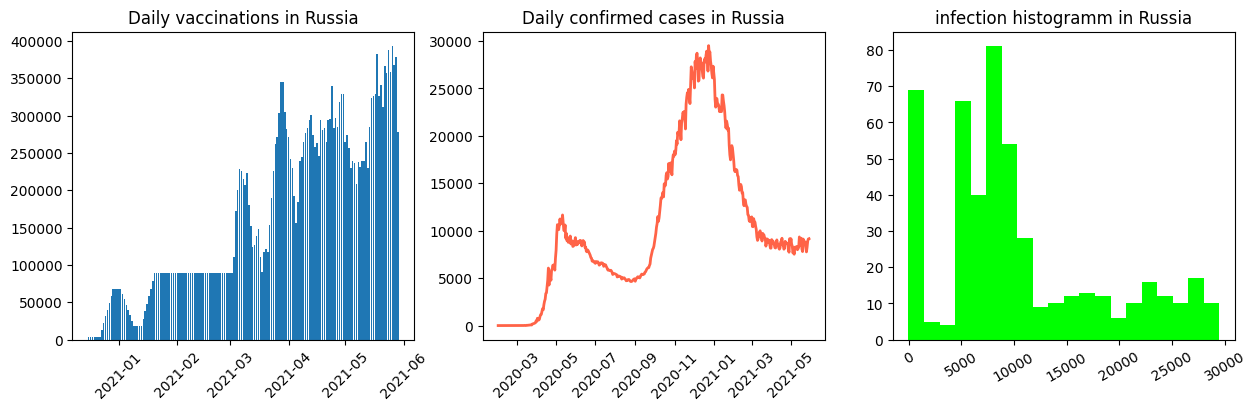

In [69]:
russian_data = covid_df[covid_df['country'] == 'Russia']

fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize=(15, 4))

axes[0].bar(
    x = russian_data['date'],
    height = russian_data['daily_vaccinations'],
    label = 'number of vaccinated'
)
axes[0].set_title('Daily vaccinations in Russia')
axes[0].xaxis.set_tick_params(rotation = 45)

axes[1].plot(
    russian_data['date'],
    russian_data['daily_confirmed'],
    label = 'number of infected',
    color = 'tomato',
    lw = 2
);
axes[1].set_title('Daily confirmed cases in Russia')
axes[1].xaxis.set_tick_params(rotation = 45)

axes[2].hist(
    x = russian_data['daily_confirmed'],
    label= 'number of infected',
    color='lime',
    bins=20
)

axes[2].set_title('infection histogramm in Russia')
axes[2].xaxis.set_tick_params(rotation = 30)

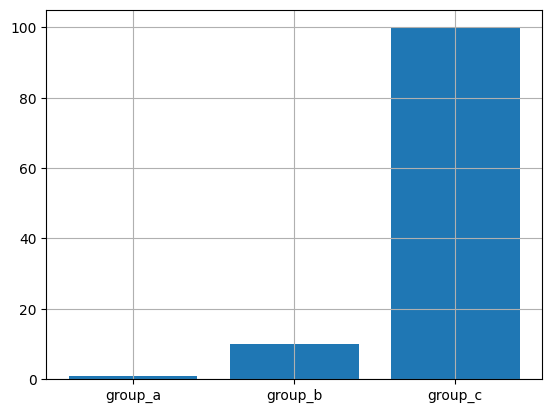

In [72]:
names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]
plt.bar(names, values)
plt.grid()
plt.show;

TypeError: 'str' object is not callable

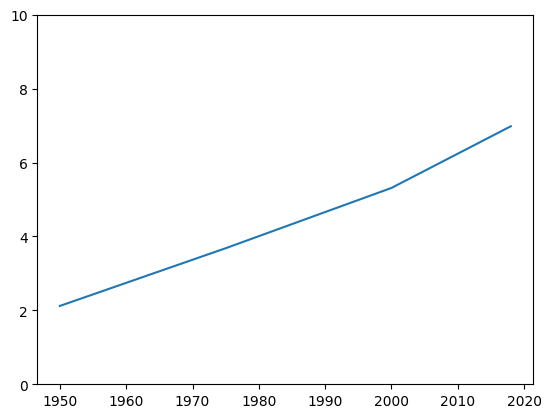

In [88]:
year = [1950, 1975, 2000, 2018]
population = [2.12, 3.681, 5.312, 6.981]
plt.plot(year, population)
plt.yticks([0, 2, 4, 6, 8, 10])
plt.xlabel('year')
plt.show;

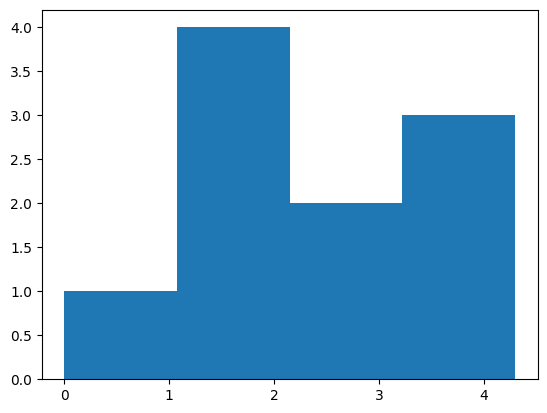

In [81]:
values = [0, 1.2, 1.3, 1.9, 4.3, 2.5, 2.7, 4.3, 1.3, 3.9]
plt.hist(values, bins=4)
plt.show;

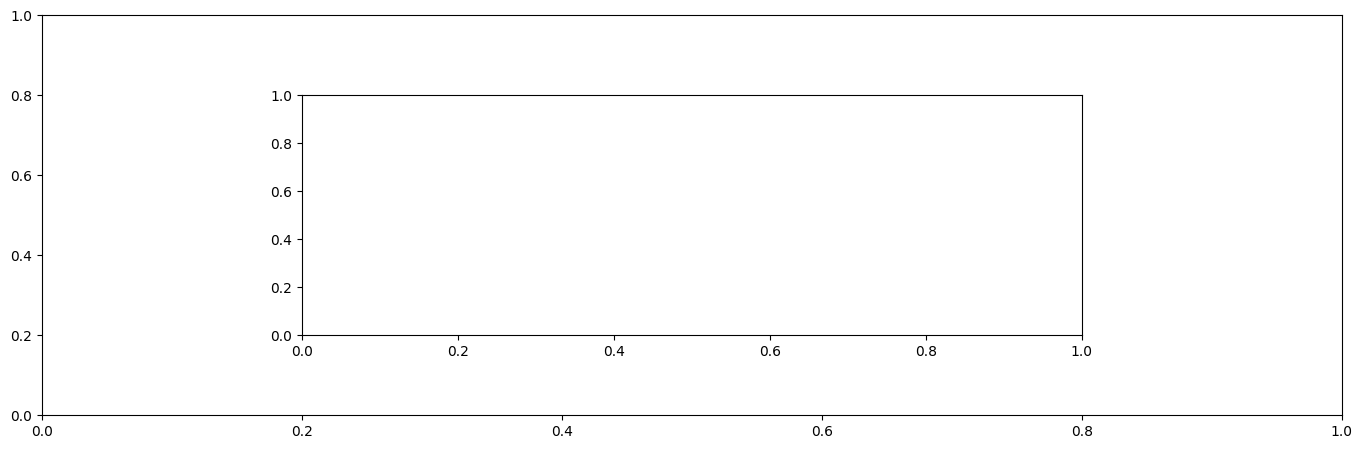

In [90]:
fig = plt.figure(figsize=(13, 4))
main_axes = fig.add_axes([0, 0, 1, 1])
insert_axes = fig.add_axes([0.2, 0.2, 0.6, 0.6])

In [94]:
covid_df.to_csv('data\covid_df.csv', index=False, sep=',')